In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
batch_size = 64

In [2]:
train_dataset = datasets.MNIST(root='./mnist_data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

Processing...
Done!


In [3]:
test_dataset = datasets.MNIST(root='./mnist_data/',
                              train=False,
                              transform=transforms.ToTensor())

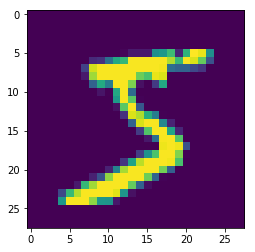

In [4]:
plt.imshow(train_dataset[0][0][0].numpy())
plt.show()

In [5]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                            batch_size=batch_size,
                                          shuffle=True)

In [6]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                            batch_size=batch_size,
                                          shuffle=False)

In [7]:
class DNN(torch.nn.Module):
    
    def __init__(self):
        super(DNN, self).__init__()
        self.l1 = nn.Linear(784, 520)
        self.l2 = nn.Linear(520, 320)
        self.l3 = nn.Linear(320, 240)
        self.l4 = nn.Linear(240, 120)
        self.l5 = nn.Linear(120, 10)
        
    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.relu(self.l4(x))
        return self.l5(x)
    
model = DNN()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(params=model.parameters(), lr=0.01, momentum=0.5)

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))

In [8]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += criterion(output, target).data[0]
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


for epoch in range(1, 10):
    train(epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.299110
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.307915
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.295491
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.303038
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.296009
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.296012
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.299777
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.294550
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.305906
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.306734
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.298852
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.303967
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.301727
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.287179
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.300725
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.301492
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.289426
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.294660
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.291257
Train Epoch: 1 [12160/60000 (20%)]	Loss: 2.292844
Train Epoch: 1 [12800/60000 (

Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.413142
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.403982
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.472975
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.547757
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.483473
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.378236
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.532132
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.404889
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.532620
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.526364
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.392191
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.361422
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.565982
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.672277
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.415105
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.628709
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.493595
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.470101
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.500016
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.554325


Train Epoch: 4 [28800/60000 (48%)]	Loss: 0.358150
Train Epoch: 4 [29440/60000 (49%)]	Loss: 0.313972
Train Epoch: 4 [30080/60000 (50%)]	Loss: 0.299289
Train Epoch: 4 [30720/60000 (51%)]	Loss: 0.198127
Train Epoch: 4 [31360/60000 (52%)]	Loss: 0.202010
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.128657
Train Epoch: 4 [32640/60000 (54%)]	Loss: 0.289912
Train Epoch: 4 [33280/60000 (55%)]	Loss: 0.218974
Train Epoch: 4 [33920/60000 (57%)]	Loss: 0.254897
Train Epoch: 4 [34560/60000 (58%)]	Loss: 0.140690
Train Epoch: 4 [35200/60000 (59%)]	Loss: 0.141704
Train Epoch: 4 [35840/60000 (60%)]	Loss: 0.411463
Train Epoch: 4 [36480/60000 (61%)]	Loss: 0.183633
Train Epoch: 4 [37120/60000 (62%)]	Loss: 0.314899
Train Epoch: 4 [37760/60000 (63%)]	Loss: 0.251009
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.367875
Train Epoch: 4 [39040/60000 (65%)]	Loss: 0.344133
Train Epoch: 4 [39680/60000 (66%)]	Loss: 0.148482
Train Epoch: 4 [40320/60000 (67%)]	Loss: 0.199384
Train Epoch: 4 [40960/60000 (68%)]	Loss: 0.222572


Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.141625
Train Epoch: 6 [13440/60000 (22%)]	Loss: 0.109500
Train Epoch: 6 [14080/60000 (23%)]	Loss: 0.205690
Train Epoch: 6 [14720/60000 (25%)]	Loss: 0.065286
Train Epoch: 6 [15360/60000 (26%)]	Loss: 0.094604
Train Epoch: 6 [16000/60000 (27%)]	Loss: 0.196006
Train Epoch: 6 [16640/60000 (28%)]	Loss: 0.256759
Train Epoch: 6 [17280/60000 (29%)]	Loss: 0.156266
Train Epoch: 6 [17920/60000 (30%)]	Loss: 0.103965
Train Epoch: 6 [18560/60000 (31%)]	Loss: 0.170314
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.039277
Train Epoch: 6 [19840/60000 (33%)]	Loss: 0.088398
Train Epoch: 6 [20480/60000 (34%)]	Loss: 0.154095
Train Epoch: 6 [21120/60000 (35%)]	Loss: 0.107185
Train Epoch: 6 [21760/60000 (36%)]	Loss: 0.182287
Train Epoch: 6 [22400/60000 (37%)]	Loss: 0.143604
Train Epoch: 6 [23040/60000 (38%)]	Loss: 0.389633
Train Epoch: 6 [23680/60000 (39%)]	Loss: 0.265023
Train Epoch: 6 [24320/60000 (41%)]	Loss: 0.261322
Train Epoch: 6 [24960/60000 (42%)]	Loss: 0.043354


Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.112547
Train Epoch: 7 [58240/60000 (97%)]	Loss: 0.142529
Train Epoch: 7 [58880/60000 (98%)]	Loss: 0.052321
Train Epoch: 7 [59520/60000 (99%)]	Loss: 0.023209

Test set: Average loss: 0.0020, Accuracy: 9638/10000 (96%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.080801
Train Epoch: 8 [640/60000 (1%)]	Loss: 0.038195
Train Epoch: 8 [1280/60000 (2%)]	Loss: 0.080842
Train Epoch: 8 [1920/60000 (3%)]	Loss: 0.091489
Train Epoch: 8 [2560/60000 (4%)]	Loss: 0.095701
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.065851
Train Epoch: 8 [3840/60000 (6%)]	Loss: 0.053523
Train Epoch: 8 [4480/60000 (7%)]	Loss: 0.149021
Train Epoch: 8 [5120/60000 (9%)]	Loss: 0.091464
Train Epoch: 8 [5760/60000 (10%)]	Loss: 0.154341
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.315701
Train Epoch: 8 [7040/60000 (12%)]	Loss: 0.112612
Train Epoch: 8 [7680/60000 (13%)]	Loss: 0.023764
Train Epoch: 8 [8320/60000 (14%)]	Loss: 0.075138
Train Epoch: 8 [8960/60000 (15%)]	Loss: 0.037533
Train Epoch: 8 [9

Train Epoch: 9 [41600/60000 (69%)]	Loss: 0.019944
Train Epoch: 9 [42240/60000 (70%)]	Loss: 0.072003
Train Epoch: 9 [42880/60000 (71%)]	Loss: 0.102188
Train Epoch: 9 [43520/60000 (72%)]	Loss: 0.038073
Train Epoch: 9 [44160/60000 (74%)]	Loss: 0.022333
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.173978
Train Epoch: 9 [45440/60000 (76%)]	Loss: 0.076874
Train Epoch: 9 [46080/60000 (77%)]	Loss: 0.070044
Train Epoch: 9 [46720/60000 (78%)]	Loss: 0.053173
Train Epoch: 9 [47360/60000 (79%)]	Loss: 0.040245
Train Epoch: 9 [48000/60000 (80%)]	Loss: 0.108553
Train Epoch: 9 [48640/60000 (81%)]	Loss: 0.134568
Train Epoch: 9 [49280/60000 (82%)]	Loss: 0.106270
Train Epoch: 9 [49920/60000 (83%)]	Loss: 0.040476
Train Epoch: 9 [50560/60000 (84%)]	Loss: 0.176019
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.015631
Train Epoch: 9 [51840/60000 (86%)]	Loss: 0.185440
Train Epoch: 9 [52480/60000 (87%)]	Loss: 0.152890
Train Epoch: 9 [53120/60000 (88%)]	Loss: 0.163861
Train Epoch: 9 [53760/60000 (90%)]	Loss: 0.075106


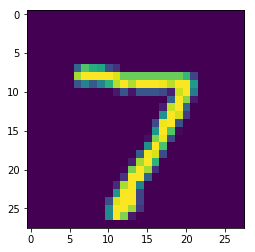

In [9]:
plt.imshow(test_dataset[0][0][0].numpy())
plt.show()

In [10]:
test_dataset[0][1]

7